script to test gym env is working normally

In [1]:
import gym
import gym_BinPack3D
from gym_BinPack3D.envs import Box, Rotate
from stable_baselines3.common.env_checker import check_env
%matplotlib notebook

using random box sequence
Box to be sampled:
Box: Size 1 1 1 Position 0 0 0
Box: Size 5 2 4 Position 0 0 0


/home/roy/anaconda3/envs/RL/lib/python3.8/site-packages/stable_baselines3/common/env_checker.py:130: UserWarning: Your observation coming_boxes has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(
/home/roy/anaconda3/envs/RL/lib/python3.8/site-packages/stable_baselines3/common/env_checker.py:130: UserWarning: Your observation height_map has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(


<IPython.core.display.Javascript object>


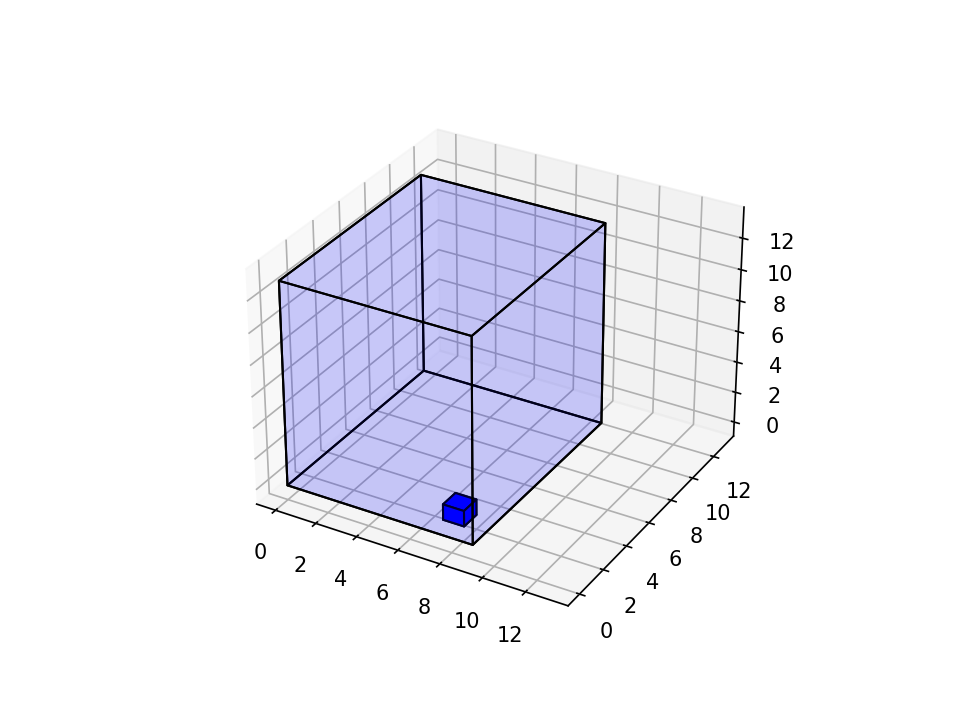

In [2]:
env = gym.make('BinPack3D-v0', 
                container_size = (9, 11, 13),
                boxSeqGenerator='random', 
                enabled_rotations = [Rotate.NOOP, Rotate.XY],
                n_foreseeable_box = 1,
                box_set = [Box(1,1,1), Box(5,2,4)]
            )
check_env(env, warn=True, skip_render_check=False)

using CUT-2 logic box sequence


<IPython.core.display.Javascript object>


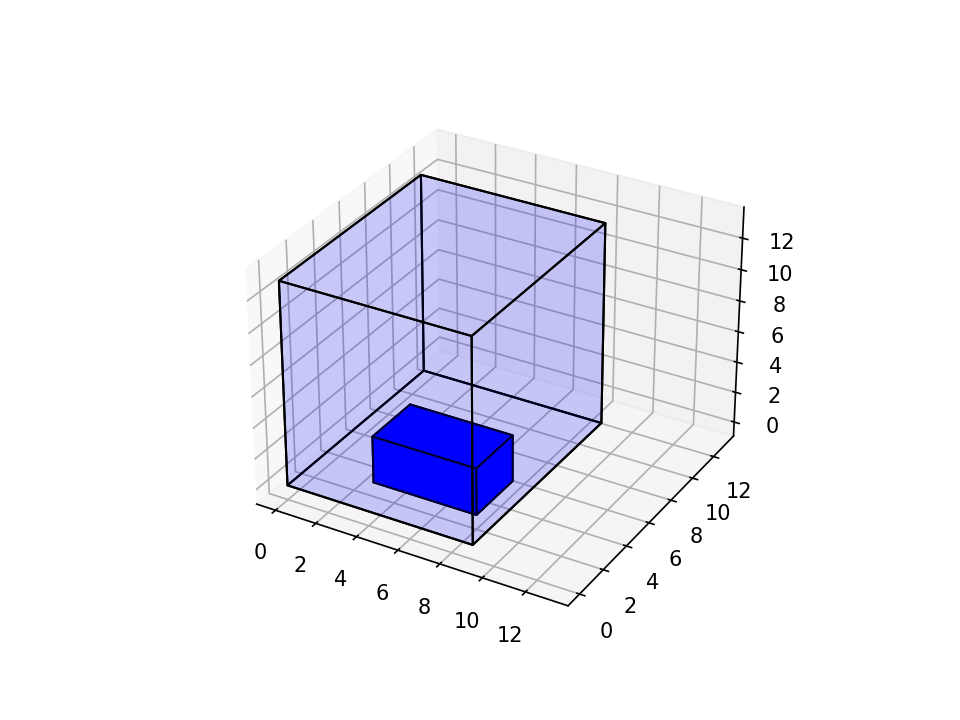

In [3]:
env = gym.make('BinPack3D-v0', 
                container_size = (9, 11, 13),
                boxSeqGenerator='CUT-2', 
                enabled_rotations = [Rotate.NOOP],
                n_foreseeable_box = 3,
                minSideLen = 2,
                maxSideLen = 5,
            )

check_env(env, warn=True, skip_render_check=False)

In [4]:
obs = env.reset()

<IPython.core.display.Javascript object>


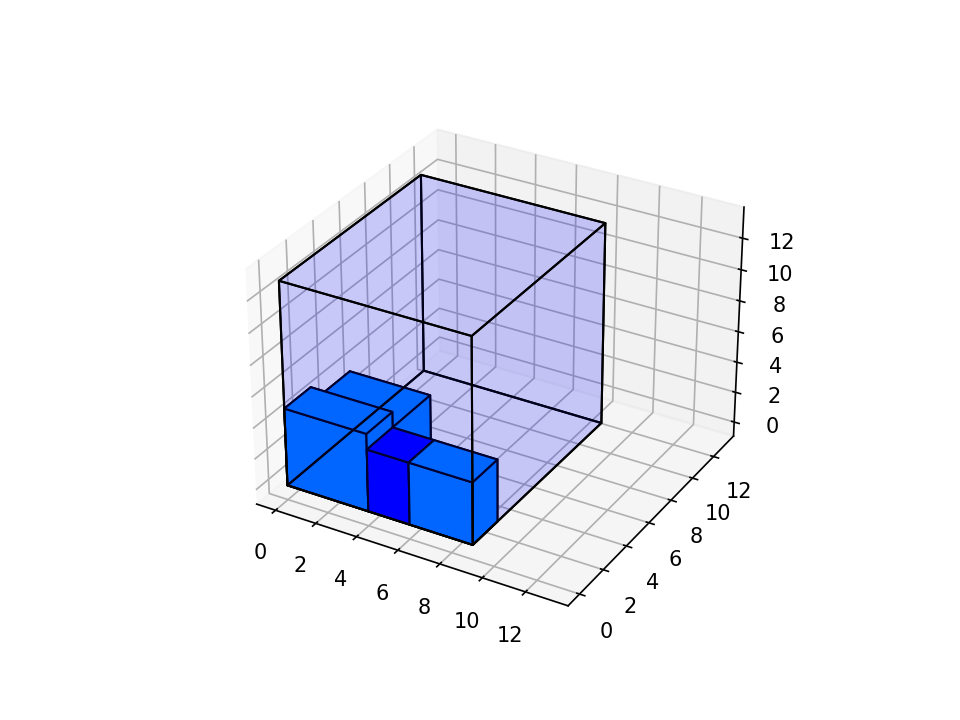

In [8]:
# we cheat to get correct pos to place box, by look at cut process info
box = env.boxSeqGenerator.next_N_boxes()[0]
pos = (box.x,box.y)
pos = env.position_to_actionIdx(pos)
rot = Rotate.NOOP
action = (pos, rot)

new_obs, reward, done, info = env.step(action)
fig = env.render()

In [11]:
import imageio

In [12]:
obs = env.reset()

with imageio.get_writer('cut2_seq.gif', mode='I') as writer:
    while True:
        # we cheat the game by look at cut process info and get the 
        # correct pos to place box, achieving perfect packing
        box = env.boxSeqGenerator.next_N_boxes()[0]
        pos = (box.x,box.y)
        pos = env.position_to_actionIdx(pos)
        rot = Rotate.NOOP
        action = (pos, rot)

        obs, reward, done, info = env.step(action)
        print(reward,done,info)
        fig = env.render("rgb_array")
        writer.append_data(fig)

        if done: break

0.24864024864024864 False {'counter': 1, 'ratio': 0.024864024864024864}
0.777000777000777 False {'counter': 2, 'ratio': 0.10256410256410256}
0.6216006216006216 False {'counter': 3, 'ratio': 0.16472416472416473}
0.27972027972027974 False {'counter': 4, 'ratio': 0.1926961926961927}
0.3108003108003108 False {'counter': 5, 'ratio': 0.22377622377622378}
0.3108003108003108 False {'counter': 6, 'ratio': 0.25485625485625485}
0.6216006216006216 False {'counter': 7, 'ratio': 0.317016317016317}
0.24864024864024864 False {'counter': 8, 'ratio': 0.3418803418803419}
0.3885003885003885 False {'counter': 9, 'ratio': 0.38073038073038074}
0.6216006216006216 False {'counter': 10, 'ratio': 0.4428904428904429}
0.1864801864801865 False {'counter': 11, 'ratio': 0.46153846153846156}
0.372960372960373 False {'counter': 12, 'ratio': 0.4988344988344988}
0.23310023310023312 False {'counter': 13, 'ratio': 0.5221445221445221}
0.777000777000777 False {'counter': 14, 'ratio': 0.5998445998445998}
0.1554001554001554 Fa

/home/roy/Documents/Robot/gym-BinPack3D/gym_BinPack3D/envs/BinPack3DEnv.py:147: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


0.372960372960373 False {'counter': 17, 'ratio': 0.6899766899766899}
0.27972027972027974 False {'counter': 18, 'ratio': 0.717948717948718}
0.13986013986013987 False {'counter': 19, 'ratio': 0.7319347319347319}
0.27972027972027974 False {'counter': 20, 'ratio': 0.7599067599067599}
0.09324009324009325 False {'counter': 21, 'ratio': 0.7692307692307693}
0.46620046620046623 False {'counter': 22, 'ratio': 0.8158508158508159}
0.27972027972027974 False {'counter': 23, 'ratio': 0.8438228438228438}
0.27972027972027974 False {'counter': 24, 'ratio': 0.8717948717948718}
0.2097902097902098 False {'counter': 25, 'ratio': 0.8927738927738927}
0.13986013986013987 False {'counter': 26, 'ratio': 0.9067599067599068}
0.09324009324009325 False {'counter': 27, 'ratio': 0.916083916083916}
0.2097902097902098 False {'counter': 28, 'ratio': 0.9370629370629371}
0.27972027972027974 False {'counter': 29, 'ratio': 0.965034965034965}
0.3496503496503497 False {'counter': 30, 'ratio': 1.0}
0.0 True {'counter': 30, 'rat

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_parallelepiped(cube_definition, ax, color=None, showEdges=True):
    """
    Draw a 3D parallelepiped to a matplotlib 3d plot
    
    
    cube_definition: corner, plus 3 pts around that corner eg.
            [(0,0,0), (0,1,0), (1,0,0), (0,0,0.1)]
            
    ax: a matplotlib 3d axis obj i.e. from:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            
    modified from: https://stackoverflow.com/questions/44881885/python-draw-parallelepiped
    """
    if color is None: color = (0,0,1,0.1)
        
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]

    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]

    
    #ax = fig.add_subplot(111, projection='3d')
    edgecolors = 'k' if showEdges else (0,0,0,0)
    faces = Poly3DCollection(edges, linewidths=1, edgecolors=edgecolors)
    faces.set_facecolor(color)

    ax.add_collection3d(faces)

    # Plot the points themselves to force the scaling of the axes
    ax.scatter(points[:,0], points[:,1], points[:,2], s=0)

    ax.set_aspect('auto')

In [ ]:
def plot_box(box, ax, color=None, showEdges=True):
    """
    box : obj of type Box
    
    ax: a matplotlib 3d axis obj i.e. from:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
    """
    dx, dy, dz = box.dx, box.dy, box.dz
    x,y,z = box.x, box.y, box.z
    
    cube_definition = [(x,y,z), 
                       (x+dx,y,z),
                       (x,y+dy,z),
                       (x,y,z+dz),
                      ]
    #print (cube_definition)
    plot_parallelepiped(cube_definition, ax, color, showEdges)

In [ ]:
def show_env(env):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')



    maxSideLen = max(env.container_size)
    box = Box(maxSideLen,maxSideLen,maxSideLen)
    plot_box(box, ax, color=(0,0,0,0), showEdges=False) # invisible bound box
    
    box = Box(*env.container_size)
    plot_box(box, ax)
    
    for box in env.container.boxes[:-1]:
        plot_box(box, ax, color=(0,0.5,1,1))
    
    box = env.container.boxes[-1]
    plot_box(box, ax, color=(0,0.,1,1))
    
    return fig
    
    


In [ ]:
fig = show_env(env)